# Question2_yz1268

In [55]:
import numpy as np
from scipy import linalg

In [56]:
world = np.loadtxt("world.txt")
image = np.loadtxt("image.txt")
len_ = len(world)

In [57]:

image_vector = np.concatenate((image,np.ones([1,image.shape[1]])),axis=0)
world_vector = np.concatenate((world,np.ones([1,world.shape[1]])),axis=0)

In [58]:
#calculating Matrix A
A = np.zeros([2*image_vector.shape[1],12])
for i in range(image_vector.shape[1]):
    A[i][4:8] = -image_vector[2][i] * world_vector[:,i]
    A[i][8:12] = image_vector[1][i] * world_vector[:,i]
    A[10+i][:4] = image_vector[2][i]*world_vector[:,i]
    A[10+i][8:12] = -image_vector[0][i]*world_vector[:,i]
    
U,D,V = np.linalg.svd(A)
P = V[-1:].reshape(3,4)

re_projection = np.dot(P,world_vector)
re_projection = re_projection/re_projection[-1]

print('Camera Intrinsic Matrix:')
print(np.round_(re_projection,3))
np.round_(image_vector,3)


Camera Intrinsic Matrix:
[[ 5.118  5.524  7.163  5.222  5.605 13.595  8.735  6.224  9.748  5.09 ]
 [ 4.765  3.87   7.359  4.428  4.675 10.052  5.564  3.908  6.904  4.551]
 [ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]]


array([[ 5.118,  5.524,  7.163,  5.222,  5.605, 13.595,  8.735,  6.224,
         9.748,  5.09 ],
       [ 4.765,  3.87 ,  7.359,  4.428,  4.675, 10.052,  5.564,  3.908,
         6.904,  4.551],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ]])

In [59]:
#calculating UsV
U, s, V = np.linalg.svd(P)
C = V[-1]
C = C[:-1]/C[-1]
print('The center of project:',C)

The center of project: [ 1. -1. -1.]


In [60]:
r,q = linalg.rq(P, mode='economic')
R = (q.T)[:-1].T
t = (q.T)[-1].T
C_answer = np.linalg.solve(-R,t)
print('Answer of C estimation:',C_answer)

Answer of C estimation: [ 1. -1. -1.]


# Question 3

In [61]:
import numpy as np
import scipy.io as sio
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sfm = sio.loadmat('sfm_points.mat')
center = np.zeros((2,1))
W = np.zeros((20, 600))

for i in range(10):
    tmp = sfm["image_points"][:, :, i]
    len_ = tmp.shape[1]
    x = np.sum(tmp[0, :])/len_
    y = np.sum(tmp[1, :])/len_
    points = np.array([x,y])
    center = np.append(center, points.reshape(-1,1), axis=1)
# exclude the first zero
#print(center)
center = center[:, 1:]
#print(center)

for i in range(10):
    part1 = sfm["image_points"][:, :, i]
    part2 = center[:, i].reshape(2,1)
    tmp = part1 - part2
    W[i] = tmp[0, :]
    W[i+10] = tmp[1, :]
#print(W)
print ('t_i (first camera): \n', center[:,0])
print ('Center for each camera t_i: \n',center[:,0:])



t_i (first camera): 
 [2.36847579e-17 8.28966525e-17]
Center for each camera t_i: 
 [[ 2.36847579e-17 -3.55271368e-17  9.47390314e-17  3.07901852e-16
   8.28966525e-17  4.73695157e-17  4.73695157e-17  7.10542736e-17
   0.00000000e+00 -1.18423789e-17]
 [ 8.28966525e-17  4.73695157e-17  0.00000000e+00  1.18423789e-17
  -3.55271368e-17  0.00000000e+00  2.36847579e-17 -7.10542736e-17
   4.73695157e-17  1.42108547e-16]]


In [62]:
print('Image Points')
matrix = sio.loadmat('sfm_points.mat')['image_points']
print(matrix.shape)

Image Points
(2, 600, 10)


In [63]:
print('Translation Vector t')
translation_vector = np.mean(matrix,axis=1)
print(translation_vector)

Translation Vector t
[[ 5.49560397e-17  3.31216536e-17 -1.06118817e-16  4.27435864e-17
  -9.25185854e-19 -7.75305746e-17  1.22124533e-17  4.99600361e-18
  -9.43689571e-18 -2.08166817e-18]
 [-7.03141249e-18  3.97829917e-18  1.24900090e-17 -1.85962357e-17
  -3.99217696e-17  8.83552490e-17  6.36527867e-17  2.71773345e-18
  -2.14643118e-17  3.85802501e-17]]


In [64]:
matrix_centered = np.zeros(matrix.shape)
for i in range(matrix_centered.shape[0]):
    for j in range(matrix_centered.shape[2]):
        matrix_centered[i,:,j] = matrix[i,:,j] - translation_vector[i][j]

measurement_matrix = np.zeros([matrix.shape[0]*matrix.shape[2],matrix.shape[1]])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[2]):
            measurement_matrix[2*j,i] = matrix_centered[0,i,j]
            measurement_matrix[2*j+1,i] = matrix_centered[1,i,j]

In [65]:
def svd_decmoposition(matrix):
    U, s, V = np.linalg.svd(matrix)
    V = V.T
    s = s * np.identity(s.shape[0])
    return U,s,V

In [66]:
print('the location of each camera')
U1, s1, V1 = svd_decmoposition(measurement_matrix)
location = np.dot(U1[:,:3],s1[:3,:3])
print(location)

the location of each camera
[[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]
 [ 0.17858821 -8.56620251 -2.47587867]
 [ 9.05169424  0.12603637  0.70587237]
 [ 8.25306132  2.16911022 -3.48212517]
 [-0.13132314 -7.68175234 -4.32518806]
 [-3.76826539 -8.34775199  1.20087007]
 [ 8.27600638 -3.50666717  0.57004455]
 [-0.73461089 -8.39784553 -2.88977146]
 [-8.50036578  1.60529571 -2.55252038]
 [ 8.45690903 -2.56525708 -1.79392742]
 [-3.28948312 -6.10374195 -5.44642826]
 [-2.96665571 -7.78843781 -3.22986642]
 [ 8.45107965 -1.64131526 -2.78078037]
 [-1.4368307  -8.62307292  3.07678742]
 [-7.95142326 -0.23710514 -4.1742912 ]
 [ 8.6277954  -2.12325785 -1.6361374 ]
 [-0.41749971  4.10544054 -8.14813897]
 [ 7.44257036 -3.77728996  3.4002285 ]
 [-5.22854825 -5.82482627  5.11580038]]


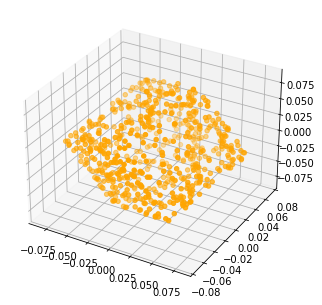

In [70]:
points = V1[:,:3]
pylab.ion()
Axes3D(pylab.figure()).scatter3D(points[:,0],points[:,1],points[:,2],marker='o',color='orange')

In [68]:

print('The first two cameras locations M_i \n',location[:2])

print('the first two translation vectors \n',translation_vector[:2])


The first two cameras locations M_i 
 [[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]]
the first two translation vectors 
 [[ 5.49560397e-17  3.31216536e-17 -1.06118817e-16  4.27435864e-17
  -9.25185854e-19 -7.75305746e-17  1.22124533e-17  4.99600361e-18
  -9.43689571e-18 -2.08166817e-18]
 [-7.03141249e-18  3.97829917e-18  1.24900090e-17 -1.85962357e-17
  -3.99217696e-17  8.83552490e-17  6.36527867e-17  2.71773345e-18
  -2.14643118e-17  3.85802501e-17]]


In [69]:

print('The first 10 cameras location \n',location[:10])

print('the first two translation vectors \n',translation_vector[:10])

print('the first 10 position locations \n',points[:10])


The first 10 cameras location 
 [[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]
 [ 0.17858821 -8.56620251 -2.47587867]
 [ 9.05169424  0.12603637  0.70587237]
 [ 8.25306132  2.16911022 -3.48212517]
 [-0.13132314 -7.68175234 -4.32518806]
 [-3.76826539 -8.34775199  1.20087007]
 [ 8.27600638 -3.50666717  0.57004455]
 [-0.73461089 -8.39784553 -2.88977146]
 [-8.50036578  1.60529571 -2.55252038]]
the first two translation vectors 
 [[ 5.49560397e-17  3.31216536e-17 -1.06118817e-16  4.27435864e-17
  -9.25185854e-19 -7.75305746e-17  1.22124533e-17  4.99600361e-18
  -9.43689571e-18 -2.08166817e-18]
 [-7.03141249e-18  3.97829917e-18  1.24900090e-17 -1.85962357e-17
  -3.99217696e-17  8.83552490e-17  6.36527867e-17  2.71773345e-18
  -2.14643118e-17  3.85802501e-17]]
the first 10 position locations 
 [[ 0.00577163  0.06460628 -0.02497615]
 [ 0.0005761   0.06885363 -0.03458151]
 [-0.04293585  0.06330479  0.02861711]
 [ 0.04745038  0.04904207 -0.01257547]
 [-0.04210186  0